In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pickle
from functions import get_dyn_v2, get_prop_abs_v2, create_R_v1, get_x2_var, get_x2_var_short_time
from functions import get_var_hist,simulate_traj, create_R, get_prop_abs, get_steady_mean, get_theo_var_l, get_non_delayed_prop, get_non_delayed_dyn
from setup import setup_matplotlib, one_col, std_height, two_col
from timeit import default_timer as timer
import scipy

setup_matplotlib()

np.random.seed(42)

In [3]:
np.pi/2

1.5707963267948966

In [18]:
k = 1
s = 0.5
D = s**2/2
ntau = 3

N_x = 30
tau = 1

dt = tau/ntau

# sb = 3
# border = sb
# dx = (sb+border)/(N_x-1)
# x_s = np.arange(-sb,border+1e-6,dx)



# def force(x,*args):
#      return -k*x

N_x_border = 6.5
dx = 1/N_x_border
sb = 15.5*dx
border = sb
x_s = np.arange(-sb,border+1e-6,dx)
N_x = len(x_s)
def cusp_force(x, thresh = 1e-7):
    if x < -thresh:
        return -k*(x+1)
    elif x > thresh:
        return -k*(x-1)
    else:
        return 0
force = np.vectorize(cusp_force)

In [19]:
N_x, len(x_s)

(32, 32)

In [20]:
x_s

array([-2.38461538, -2.23076923, -2.07692308, -1.92307692, -1.76923077,
       -1.61538462, -1.46153846, -1.30769231, -1.15384615, -1.        ,
       -0.84615385, -0.69230769, -0.53846154, -0.38461538, -0.23076923,
       -0.07692308,  0.07692308,  0.23076923,  0.38461538,  0.53846154,
        0.69230769,  0.84615385,  1.        ,  1.15384615,  1.30769231,
        1.46153846,  1.61538462,  1.76923077,  1.92307692,  2.07692308,
        2.23076923,  2.38461538])

In [21]:
all_states = np.arange(0, N_x**(ntau+1))
end_states = np.stack([all_states[all_states//N_x**ntau == i] for i in range(N_x)])

In [22]:
prop = get_prop_abs_v2(x_s, force,D,dt,dx)
R, _, end_states = create_R_v1(N_x, ntau, prop)

In [23]:
evals, evect = scipy.sparse.linalg.eigs(R, k = 4)

In [24]:
evals

array([0.9926329 +0.j        , 0.96378512+0.j        ,
       0.75953081+0.34527104j, 0.75953081-0.34527104j])

In [33]:
idx = 0
main_eval = np.abs(evals[idx])
main_evect = np.real(evect[:,idx])
if main_evect.sum() < 0:
    main_evect *= -1

In [34]:
main_evect[main_evect < 0].sum()/main_evect.sum()

-3.194951466796828e-16

In [35]:
end_states.shape

(32, 32768)

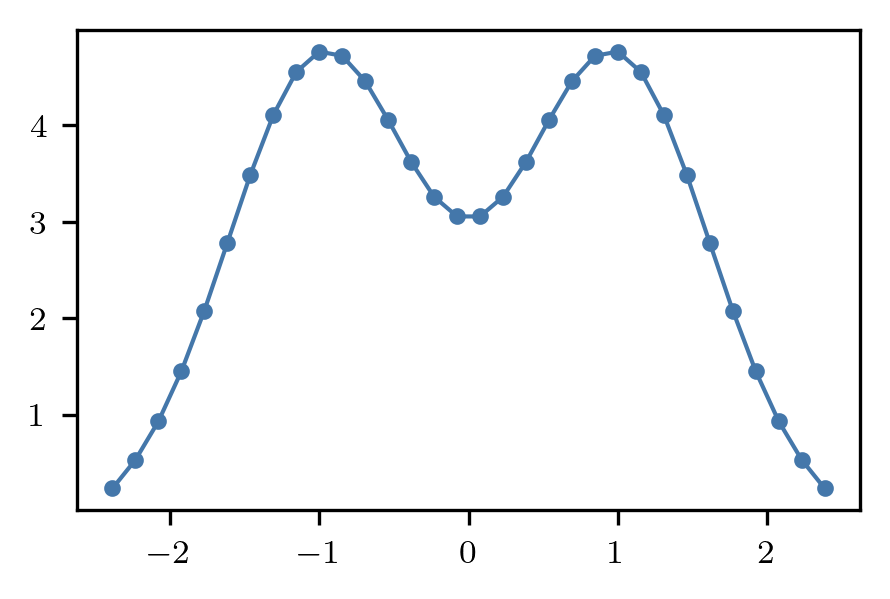

In [36]:
plt.plot(x_s, main_evect[end_states].sum(axis = 1), '.-')
#plt.yscale('log')

In [15]:
get_var_hist(main_evect[end_states].sum(axis = 1), x_s)

1.046175228391254